In [445]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [446]:
# load data into pandas dataframe
tweetData = pd.read_csv('../data/raw/Twitter_volume_AMZN.csv')
tweetData

,timestamp,value
0,2015-02-26 21:42:53,57
1,2015-02-26 21:47:53,43
2,2015-02-26 21:52:53,55
3,2015-02-26 21:57:53,64
4,2015-02-26 22:02:53,93
...,...,...
15826,2015-04-22 20:32:53,51
15827,2015-04-22 20:37:53,54
15828,2015-04-22 20:42:53,46
15829,2015-04-22 20:47:53,56


Feature Engineering spliting timestamp in to its components Year, Month, Day, Hour, Minute, Second

                timestamp  value  Year  Month  Day  Hour  Minute  Second
0     2015-02-26 21:42:53     57  2015      2   26    21      42      53
1     2015-02-26 21:47:53     43  2015      2   26    21      47      53
2     2015-02-26 21:52:53     55  2015      2   26    21      52      53
3     2015-02-26 21:57:53     64  2015      2   26    21      57      53
4     2015-02-26 22:02:53     93  2015      2   26    22       2      53
...                   ...    ...   ...    ...  ...   ...     ...     ...
15826 2015-04-22 20:32:53     51  2015      4   22    20      32      53
15827 2015-04-22 20:37:53     54  2015      4   22    20      37      53
15828 2015-04-22 20:42:53     46  2015      4   22    20      42      53
15829 2015-04-22 20:47:53     56  2015      4   22    20      47      53
15830 2015-04-22 20:52:53     50  2015      4   22    20      52      53

[15831 rows x 8 columns]


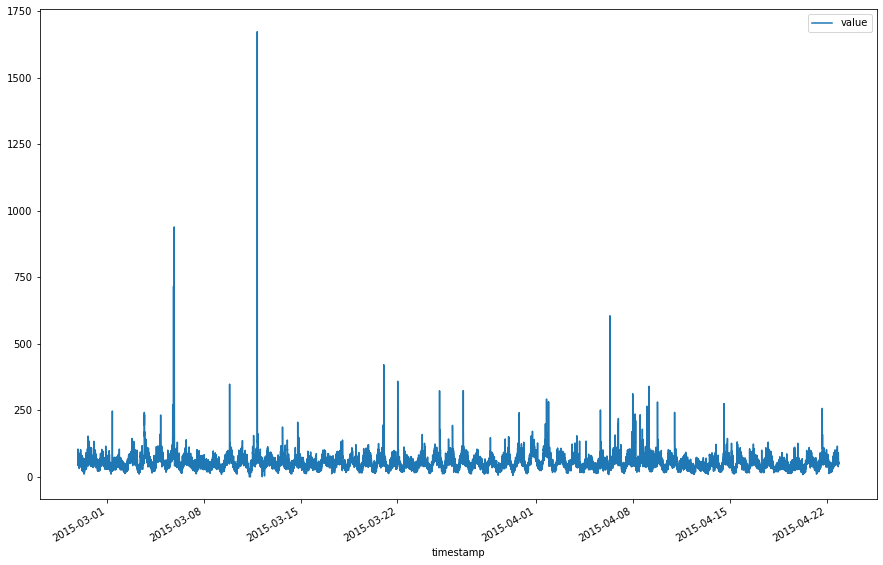

In [447]:
tweetData['timestamp'] = pd.to_datetime(productData.timestamp)
tweetData['Year'] = tweetData['timestamp'].dt.year
tweetData['Month'] = tweetData['timestamp'].dt.month
tweetData['Day'] = tweetData['timestamp'].dt.day
tweetData['Hour'] = tweetData['timestamp'].dt.hour
tweetData['Minute'] = tweetData['timestamp'].dt.minute
tweetData['Second'] = tweetData['timestamp'].dt.second
print(tweetData)
tweetData.plot(x='timestamp', y='value',figsize=(15,10))

Feature engineering adding column for day of week Monday (0) - Sunday (6). Anomolies may be more likely to occur at different days of the week. 

In [448]:
tweetData['DayOfWeek'] = tweetData.timestamp.dt.weekday
tweetData

,timestamp,value,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,2015-02-26 21:42:53,57,2015,2,26,21,42,53,3
1,2015-02-26 21:47:53,43,2015,2,26,21,47,53,3
2,2015-02-26 21:52:53,55,2015,2,26,21,52,53,3
3,2015-02-26 21:57:53,64,2015,2,26,21,57,53,3
4,2015-02-26 22:02:53,93,2015,2,26,22,2,53,3
...,...,...,...,...,...,...,...,...,...
15826,2015-04-22 20:32:53,51,2015,4,22,20,32,53,2
15827,2015-04-22 20:37:53,54,2015,4,22,20,37,53,2
15828,2015-04-22 20:42:53,46,2015,4,22,20,42,53,2
15829,2015-04-22 20:47:53,56,2015,4,22,20,47,53,2


Feature engineering splitting into Morning (5-12), Afternoon (12-17), Evening (17-21), and night (21-5). Anomalies may be more likely to occur at different times of day.

In [449]:
# Morning
tweetData.loc[(tweetData['Hour'] >= 5) & (tweetData['Hour'] <12), 'TimeOfDay'] = 0
# Afternoon
tweetData.loc[(tweetData['Hour'] >= 12) & (tweetData['Hour'] <17), 'TimeOfDay'] = 1
# Evening
tweetData.loc[(tweetData['Hour'] >= 17) & (tweetData['Hour'] <21), 'TimeOfDay'] = 2
# Night
tweetData.loc[(tweetData['Hour'] >= 21), 'TimeOfDay'] = 3
tweetData.loc[(tweetData['Hour'] <5), 'TimeOfDay'] = 3
tweetData.TimeOfDay = tweetData.TimeOfDay.astype(int)

In [450]:
tweetData

,timestamp,value,Year,Month,Day,Hour,Minute,Second,DayOfWeek,TimeOfDay
0,2015-02-26 21:42:53,57,2015,2,26,21,42,53,3,3
1,2015-02-26 21:47:53,43,2015,2,26,21,47,53,3,3
2,2015-02-26 21:52:53,55,2015,2,26,21,52,53,3,3
3,2015-02-26 21:57:53,64,2015,2,26,21,57,53,3,3
4,2015-02-26 22:02:53,93,2015,2,26,22,2,53,3,3
...,...,...,...,...,...,...,...,...,...,...
15826,2015-04-22 20:32:53,51,2015,4,22,20,32,53,2,2
15827,2015-04-22 20:37:53,54,2015,4,22,20,37,53,2,2
15828,2015-04-22 20:42:53,46,2015,4,22,20,42,53,2,2
15829,2015-04-22 20:47:53,56,2015,4,22,20,47,53,2,2


Write the feature engineered file to a .csv file

In [451]:
tweetData.to_csv('../data/processed/processedTweets.csv', sep=',')

Preparing data for usage in model by scaling the data and removing the timestamp column.

In [452]:
modelData = tweetData.drop('timestamp', axis = 1)
scaler = preprocessing.StandardScaler()
scaledData = scaler.fit_transform(modelData)
# transform back into a dataframe
scaledData = pd.DataFrame(scaledData)

Running data through an isolation forest Since I do not know the actual percentage of anamolies in this data set, I chose contamination to be 5%. My choice in number of estimators was arbitrary. 

In [453]:
model=IsolationForest(n_estimators=100 , contamination=float(0.05))
model.fit(scaledData)
tweetData['isAnomaly'] = pd.Series(model.predict(scaledData))
tweetData['isAnomaly'] = tweetData['isAnomaly'].apply(lambda x: 1 if x== -1 else 0)
print(tweetData.isAnomaly.value_counts())
anomalyData = tweetData.loc[tweetData['isAnomaly'] == 1]
anomalyData = anomalyData [['timestamp','value']]
anomalyData

0    15039
1      792
Name: isAnomaly, dtype: int64


,timestamp,value
0,2015-02-26 21:42:53,57
1,2015-02-26 21:47:53,43
2,2015-02-26 21:52:53,55
3,2015-02-26 21:57:53,64
4,2015-02-26 22:02:53,93
...,...,...
15268,2015-04-20 22:02:53,91
15280,2015-04-20 23:02:53,48
15489,2015-04-21 16:27:53,257
15490,2015-04-21 16:32:53,164


The Isolation Forest detects 792 anomalies.  

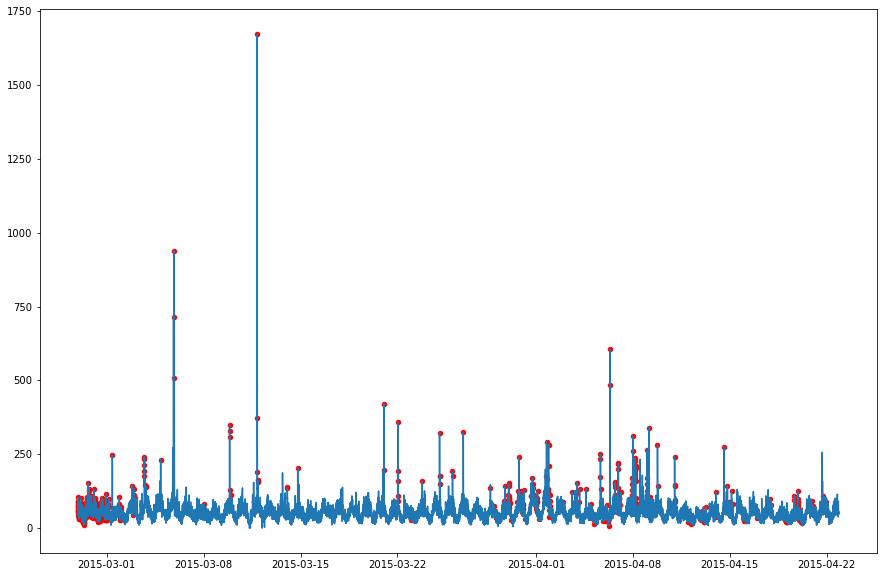

In [454]:
f, ax = plt.subplots(figsize=(15,10))
ax.plot(tweetData['timestamp'], tweetData['value'])
ax.scatter(anamolyData['timestamp'], anamolyData['value'], color = 'red', s=20)
plt.show()

Running data through a one class SVM. Since I do not know the actual percentage of anamolies in this data set, I chose nu to be 5%

In [455]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.05)
model.fit(scaledData)
tweetData['isAnomaly2'] = pd.Series(model.predict(scaledData))
tweetData['isAnomaly2'] = tweetData['isAnomaly2'].apply(lambda x: 1 if x== -1 else 0)
print(tweetData.isAnomaly2.value_counts())
anomalyData2 = tweetData.loc[tweetData['isAnomaly2'] == 1]
anomalyData2 = anomalyData2 [['timestamp','value']]
anomalyData2

0    15039
1      792
Name: isAnomaly2, dtype: int64


,timestamp,value
3,2015-02-26 21:57:53,64
4,2015-02-26 22:02:53,93
5,2015-02-26 22:07:53,104
14,2015-02-26 22:52:53,80
15,2015-02-26 22:57:53,76
...,...,...
15352,2015-04-21 05:02:53,24
15364,2015-04-21 06:02:53,21
15489,2015-04-21 16:27:53,257
15490,2015-04-21 16:32:53,164


The SVM detects 792 anomalies.

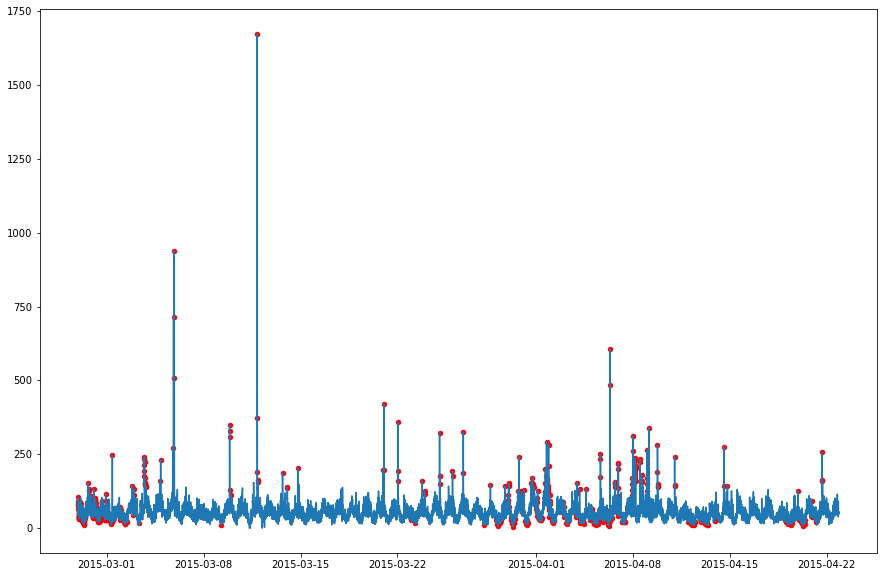

In [456]:
f, ax = plt.subplots(figsize=(15,10))
ax.plot(tweetData['timestamp'], tweetData['value'])
ax.scatter(anamolyData2['timestamp'], anamolyData2['value'], color = 'red', s=20)
plt.show()

Both, isolation forest and svm do a good job of detecting outliers that are high in value. I think they both also misclassify some of the lower values as outliers. I think that the isolation does a better job of classifying the lower values. 